In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.cost_history = []#To store loss value after every iteration. so as to plot in a graphh

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h, y):
        m = len(y)
        return - (1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    
    def fit(self, X, y):
        
        m, n = X.shape
        self.weights = np.zeros(n)#the 0 will be eaql to the no. of features that means for every feature

        for _ in range(self.iterations):#ignoring the loop variable
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)

            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)

In [5]:
# Generate dataset
np.random.seed(42)
X = np.random.rand(200, 2) * 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train our logistic regression model
model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


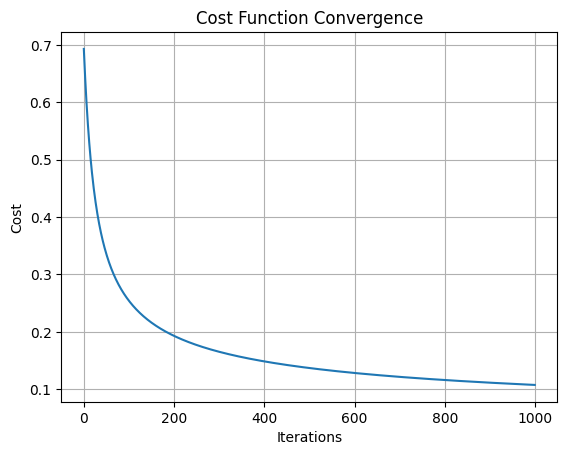

In [7]:
plt.plot(model.cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()